# Investor-Ready Analytics for Kikapu Naturals

Scope focuses on performing comprehensive exploratory analysis including:
 - Data quality assessment
 - Customer segmentation and behavior
 - Cohort retention analysis
 - Lifetime Value (LTV) calculations
 - Product performance metrics
 - Funnel analysis
 

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
import warnings
from typing import List, Dict, Tuple

warnings.filterwarnings('ignore')

# Set styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

print("✓ All dependencies loaded successfully")

✓ All dependencies loaded successfully


## Loading Datasets

In [2]:
# Load datasets
customers = pd.read_csv('kikapu_data\kikapu_customers.csv')
products = pd.read_csv('kikapu_data\kikapu_products.csv')
orders = pd.read_csv('kikapu_data\kikapu_orders.csv')
order_line_items = pd.read_csv('kikapu_data\kikapu_order_line_items.csv')


In [ ]:
# Quick overview of customers dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50200 entries, 0 to 50199
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       50200 non-null  object
 1   segment           50200 non-null  object
 2   acquisition_date  49213 non-null  object
 3   channel           49710 non-null  object
 4   country           50200 non-null  object
 5   status            50200 non-null  object
 6   company_name      200 non-null    object
 7   account_tier      200 non-null    object
dtypes: object(8)
memory usage: 3.1+ MB


In [4]:
# Quick overview of products dataset
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    10 non-null     object 
 1   category      10 non-null     object 
 2   name          10 non-null     object 
 3   unit_price    10 non-null     float64
 4   avg_cogs      10 non-null     float64
 5   active_since  10 non-null     object 
dtypes: float64(2), object(4)
memory usage: 608.0+ bytes


In [5]:
# Quick overview of orders dataset
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212407 entries, 0 to 212406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          212407 non-null  object 
 1   customer_id       212407 non-null  object 
 2   order_date        211394 non-null  object 
 3   subtotal          212407 non-null  float64
 4   discount_percent  212407 non-null  int64  
 5   discount_amount   212407 non-null  float64
 6   revenue           212407 non-null  float64
 7   total_cogs        205984 non-null  float64
 8   profit            205984 non-null  float64
 9   num_items         212407 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
# Quick overview of order_line_items dataset
order_line_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441528 entries, 0 to 441527
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   line_item_id     441528 non-null  object 
 1   order_id         441528 non-null  object 
 2   customer_id      441528 non-null  object 
 3   product_id       441528 non-null  object 
 4   product_name     441528 non-null  object 
 5   category         441528 non-null  object 
 6   quantity         441528 non-null  int64  
 7   unit_price       441528 non-null  float64
 8   subtotal         441528 non-null  float64
 9   discount_amount  441528 non-null  float64
 10  revenue          441528 non-null  float64
 11  cogs             441528 non-null  float64
 12  profit           441528 non-null  float64
 13  order_date       439376 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 47.2+ MB


## Data Profiles and Quality Assurance

Reviewing the datasets' profiles and quality assurance issues

In [7]:
# Dataset Overview & Statistics

# Summary statistics
total_revenue = orders['revenue'].sum()
total_profit = orders['profit'].dropna().sum()

print("="*70)
print("KIKAPU NATURALS - DATASET SUMMARY")
print("="*70)
print(f"\nCustomers:")
print(f"  D2C Customers:      {len(customers[customers['segment']=='D2C']):>10,}")
print(f"  B2B Clients:        {len(customers[customers['segment']=='B2B']):>10,}")
print(f"  Total:              {len(customers):>10,}")

print(f"\nTransactions:")
print(f"  Total Orders:       {len(orders):>10,}")
print(f"  Total Line Items:   {len(order_line_items):>10,}")

print(f"\nFinancials:")
print(f"  Total Revenue:      ${total_revenue:>15,.2f}")
print(f"  Total Profit:       ${total_profit:>15,.2f}")
print(f"  Profit Margin:      {(total_profit/total_revenue*100):>14,.1f}%")

print(f"\nDate Range:")
print(f"  Start:              2022-01-01")
print(f"  End:                2024-11-30")
print(f"  Duration:           35 months")
print("="*70)




KIKAPU NATURALS - DATASET SUMMARY

Customers:
  D2C Customers:          50,000
  B2B Clients:               200
  Total:                  50,200

Transactions:
  Total Orders:          212,407
  Total Line Items:      441,528

Financials:
  Total Revenue:      $  44,115,401.64
  Total Profit:       $  21,641,505.12
  Profit Margin:                49.1%

Date Range:
  Start:              2022-01-01
  End:                2024-11-30
  Duration:           35 months


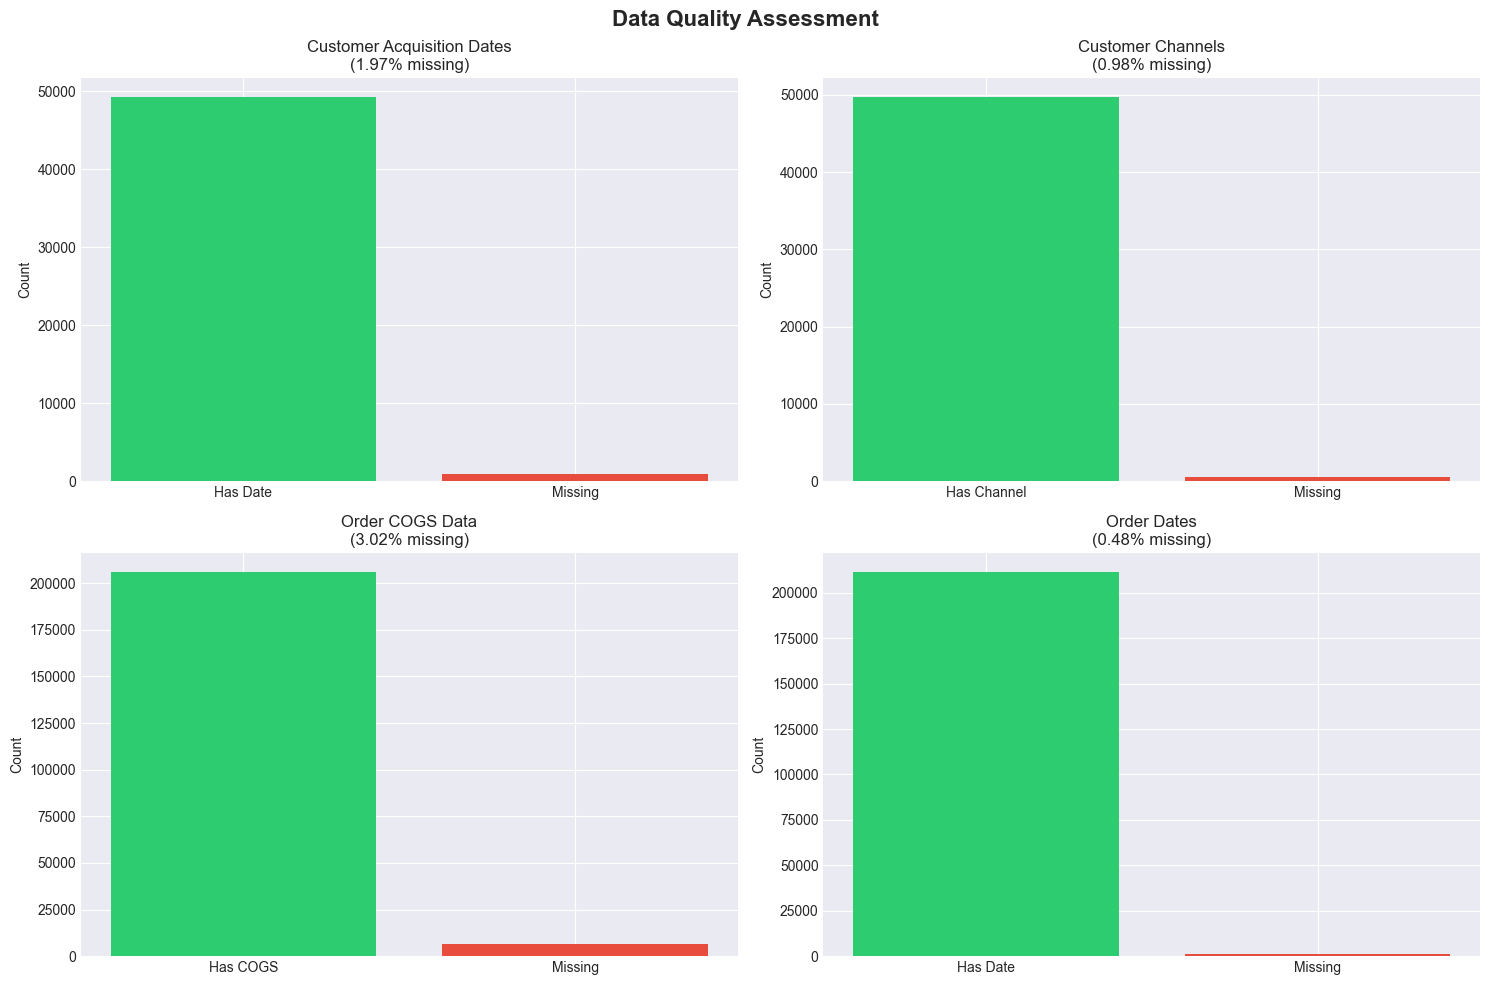


Data Quality Summary:
  Missing Acquisition Dates: 987 (1.97%)
  Missing Channels:          490 (0.98%)
  Missing COGS:              6,423 (3.02%)
  Missing Order Dates:       1,013 (0.48%)


In [ ]:
# ----Data Quality Assessment---

# Data quality checks
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Data Quality Assessment', fontsize=16, fontweight='bold')

# Missing acquisition dates
missing_acq = customers['acquisition_date'].isna().sum()
missing_acq_pct = missing_acq / len(customers) * 100
axes[0, 0].bar(['Has Date', 'Missing'],
               [len(customers) - missing_acq, missing_acq],
               color=['#2ecc71', '#e74c3c'])
axes[0, 0].set_title(f'Customer Acquisition Dates\n({missing_acq_pct:.2f}% missing)')
axes[0, 0].set_ylabel('Count')

# Missing channels
missing_channel = customers['channel'].isna().sum()
missing_channel_pct = missing_channel / len(customers) * 100
axes[0, 1].bar(['Has Channel', 'Missing'],
               [len(customers) - missing_channel, missing_channel],
               color=['#2ecc71', '#e74c3c'])
axes[0, 1].set_title(f'Customer Channels\n({missing_channel_pct:.2f}% missing)')
axes[0, 1].set_ylabel('Count')

# Missing COGS
missing_cogs = orders['total_cogs'].isna().sum()
missing_cogs_pct = missing_cogs / len(orders) * 100
axes[1, 0].bar(['Has COGS', 'Missing'],
               [len(orders) - missing_cogs, missing_cogs],
               color=['#2ecc71', '#e74c3c'])
axes[1, 0].set_title(f'Order COGS Data\n({missing_cogs_pct:.2f}% missing)')
axes[1, 0].set_ylabel('Count')

# Missing order dates
missing_dates = orders['order_date'].isna().sum()
missing_dates_pct = missing_dates / len(orders) * 100
axes[1, 1].bar(['Has Date', 'Missing'],
               [len(orders) - missing_dates, missing_dates],
               color=['#2ecc71', '#e74c3c'])
axes[1, 1].set_title(f'Order Dates\n({missing_dates_pct:.2f}% missing)')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("\nData Quality Summary:")
print(f"  Missing Acquisition Dates: {missing_acq:,} ({missing_acq_pct:.2f}%)")
print(f"  Missing Channels:          {missing_channel:,} ({missing_channel_pct:.2f}%)")
print(f"  Missing COGS:              {missing_cogs:,} ({missing_cogs_pct:.2f}%)")
print(f"  Missing Order Dates:       {missing_dates:,} ({missing_dates_pct:.2f}%)")



## General Overview: Customr Profile, Channel, and Country

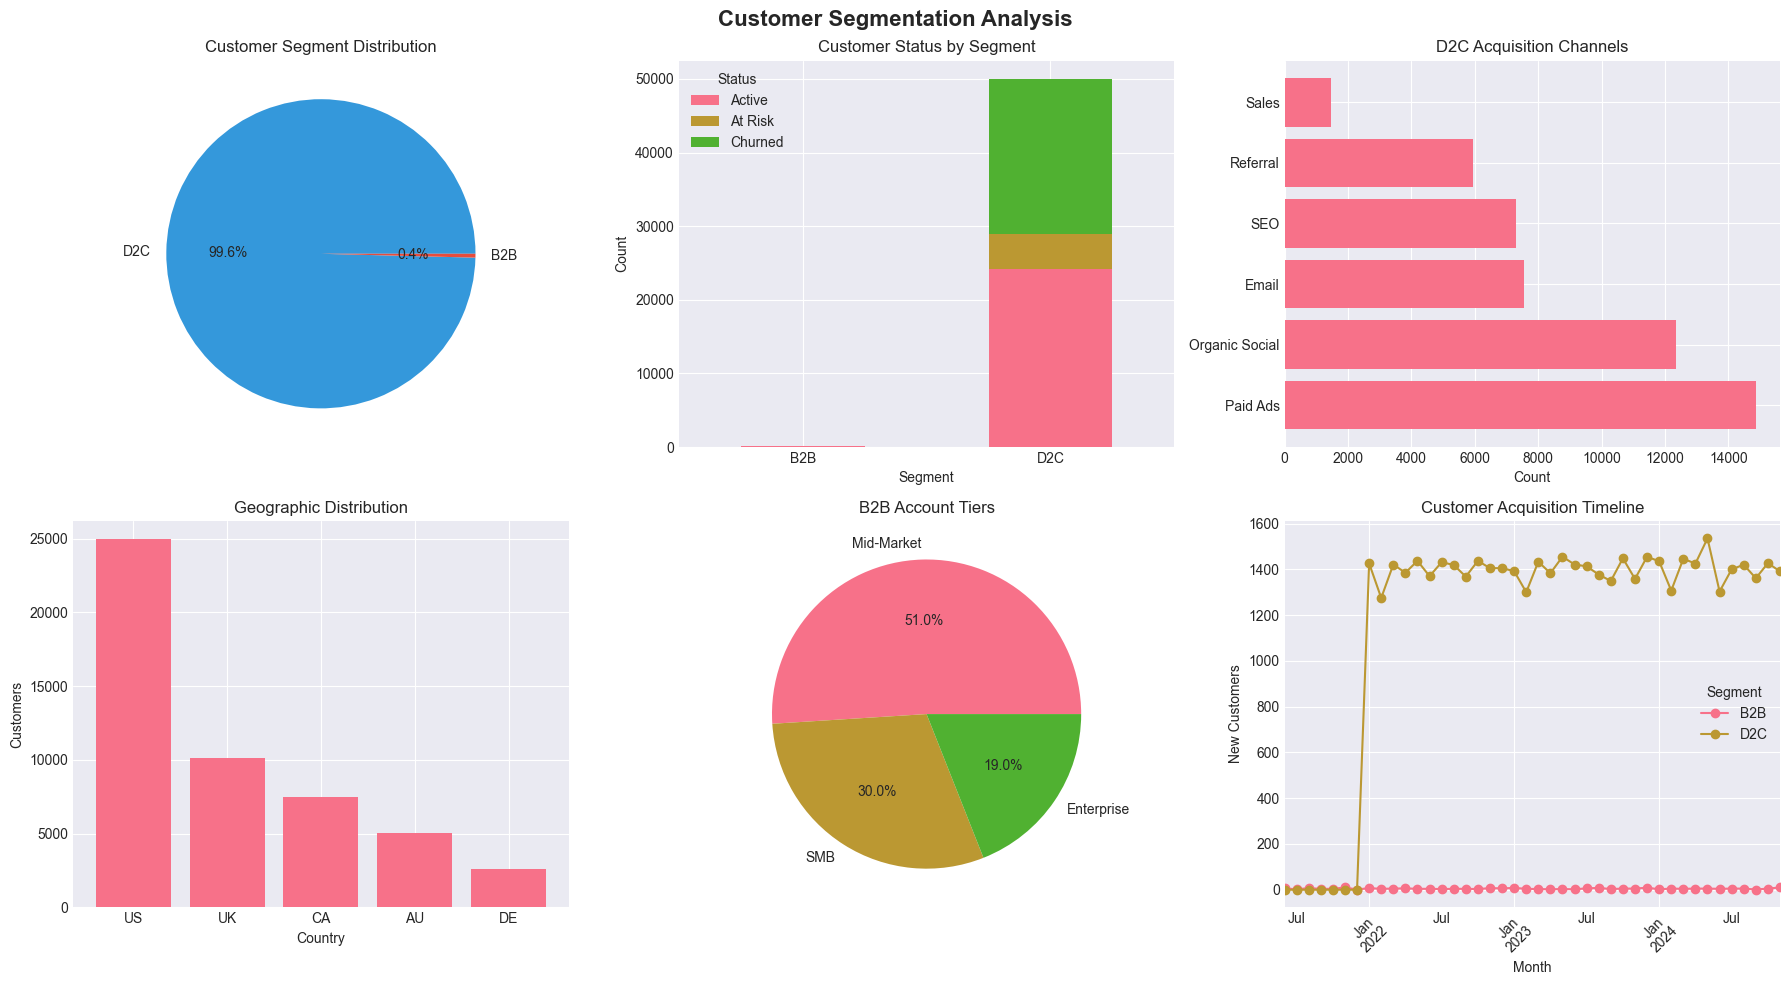

In [9]:
# Merge customers with orders for analysis
customers_clean = customers[customers['acquisition_date'].notna()].copy()
customers_clean['acquisition_date'] = pd.to_datetime(customers_clean['acquisition_date'])

orders_clean = orders[orders['order_date'].notna()].copy()
orders_clean['order_date'] = pd.to_datetime(orders_clean['order_date'])

# Customer segmentation
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Customer Segmentation Analysis', fontsize=16, fontweight='bold')

# Segment distribution
segment_counts = customers['segment'].value_counts()
axes[0, 0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
               colors=['#3498db', '#e74c3c'])
axes[0, 0].set_title('Customer Segment Distribution')

# Status distribution by segment
status_data = customers.groupby(['segment', 'status']).size().unstack(fill_value=0)
status_data.plot(kind='bar', ax=axes[0, 1], stacked=True)
axes[0, 1].set_title('Customer Status by Segment')
axes[0, 1].set_xlabel('Segment')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Status')
axes[0, 1].tick_params(axis='x', rotation=0)

# Channel distribution (D2C only)
d2c_channels = customers[customers['segment']=='D2C']['channel'].value_counts()
axes[0, 2].barh(d2c_channels.index, d2c_channels.values)
axes[0, 2].set_title('D2C Acquisition Channels')
axes[0, 2].set_xlabel('Count')

# Country distribution
country_counts = customers['country'].value_counts()
axes[1, 0].bar(country_counts.index, country_counts.values)
axes[1, 0].set_title('Geographic Distribution')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Customers')

# B2B account tiers
b2b_tiers = customers[customers['segment']=='B2B']['account_tier'].value_counts()
axes[1, 1].pie(b2b_tiers.values, labels=b2b_tiers.index, autopct='%1.1f%%')
axes[1, 1].set_title('B2B Account Tiers')

# Acquisition timeline
customers_clean['acquisition_month'] = customers_clean['acquisition_date'].dt.to_period('M')
acq_timeline = customers_clean.groupby(['acquisition_month', 'segment']).size().unstack(fill_value=0)
acq_timeline.plot(ax=axes[1, 2], marker='o')
axes[1, 2].set_title('Customer Acquisition Timeline')
axes[1, 2].set_xlabel('Month')
axes[1, 2].set_ylabel('New Customers')
axes[1, 2].legend(title='Segment')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Revenue & Profitability Analysis

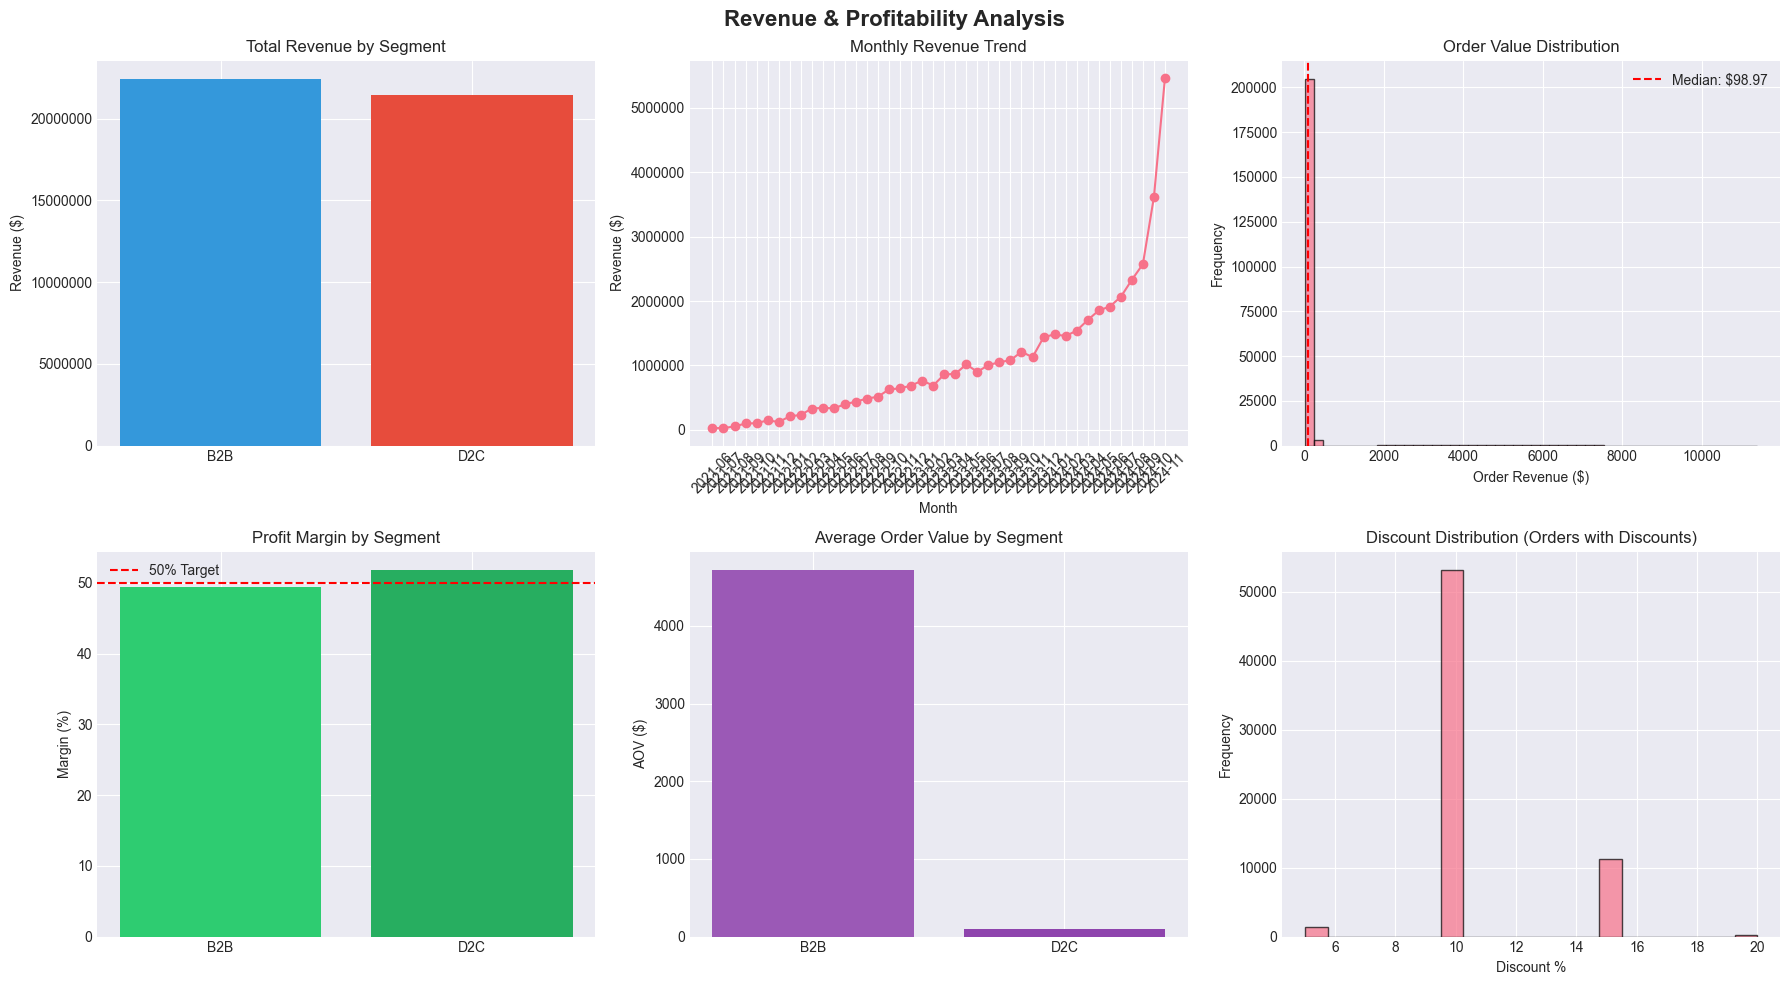

In [10]:

# Revenue analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Revenue & Profitability Analysis', fontsize=16, fontweight='bold')

# Revenue by segment
segment_revenue = orders_clean.merge(customers[['customer_id', 'segment']], on='customer_id')
segment_rev = segment_revenue.groupby('segment')['revenue'].sum()
axes[0, 0].bar(segment_rev.index, segment_rev.values, color=['#3498db', '#e74c3c'])
axes[0, 0].set_title('Total Revenue by Segment')
axes[0, 0].set_ylabel('Revenue ($)')
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Monthly revenue trend
orders_clean['order_month'] = orders_clean['order_date'].dt.to_period('M')
monthly_rev = orders_clean.groupby('order_month')['revenue'].sum()
axes[0, 1].plot(monthly_rev.index.astype(str), monthly_rev.values, marker='o')
axes[0, 1].set_title('Monthly Revenue Trend')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].ticklabel_format(style='plain', axis='y')

# Order value distribution
axes[0, 2].hist(orders['revenue'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Order Value Distribution')
axes[0, 2].set_xlabel('Order Revenue ($)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].axvline(orders['revenue'].median(), color='red', linestyle='--', 
                   label=f'Median: ${orders["revenue"].median():.2f}')
axes[0, 2].legend()

# Profit margin by segment
segment_profit = segment_revenue[segment_revenue['profit'].notna()]
segment_margins = segment_profit.groupby('segment').apply(
    lambda x: (x['profit'].sum() / x['revenue'].sum() * 100)
)
axes[1, 0].bar(segment_margins.index, segment_margins.values, color=['#2ecc71', '#27ae60'])
axes[1, 0].set_title('Profit Margin by Segment')
axes[1, 0].set_ylabel('Margin (%)')
axes[1, 0].axhline(y=50, color='red', linestyle='--', label='50% Target')
axes[1, 0].legend()

# Average order value by segment
avg_order = segment_revenue.groupby('segment')['revenue'].mean()
axes[1, 1].bar(avg_order.index, avg_order.values, color=['#9b59b6', '#8e44ad'])
axes[1, 1].set_title('Average Order Value by Segment')
axes[1, 1].set_ylabel('AOV ($)')

# Discount analysis
discount_data = orders[orders['discount_amount'] > 0]
axes[1, 2].hist(discount_data['discount_percent'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 2].set_title('Discount Distribution (Orders with Discounts)')
axes[1, 2].set_xlabel('Discount %')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [11]:
print("\nRevenue Metrics:")
print(f"  Total Revenue:           ${orders['revenue'].sum():,.2f}")
print(f"  D2C Revenue:             ${segment_rev.get('D2C', 0):,.2f}")
print(f"  B2B Revenue:             ${segment_rev.get('B2B', 0):,.2f}")
print(f"  Average Order Value:     ${orders['revenue'].mean():,.2f}")
print(f"  Median Order Value:      ${orders['revenue'].median():,.2f}")


Revenue Metrics:
  Total Revenue:           $44,115,401.64
  D2C Revenue:             $21,436,828.94
  B2B Revenue:             $22,423,473.85
  Average Order Value:     $207.69
  Median Order Value:      $98.97


## Product Performance Analysis

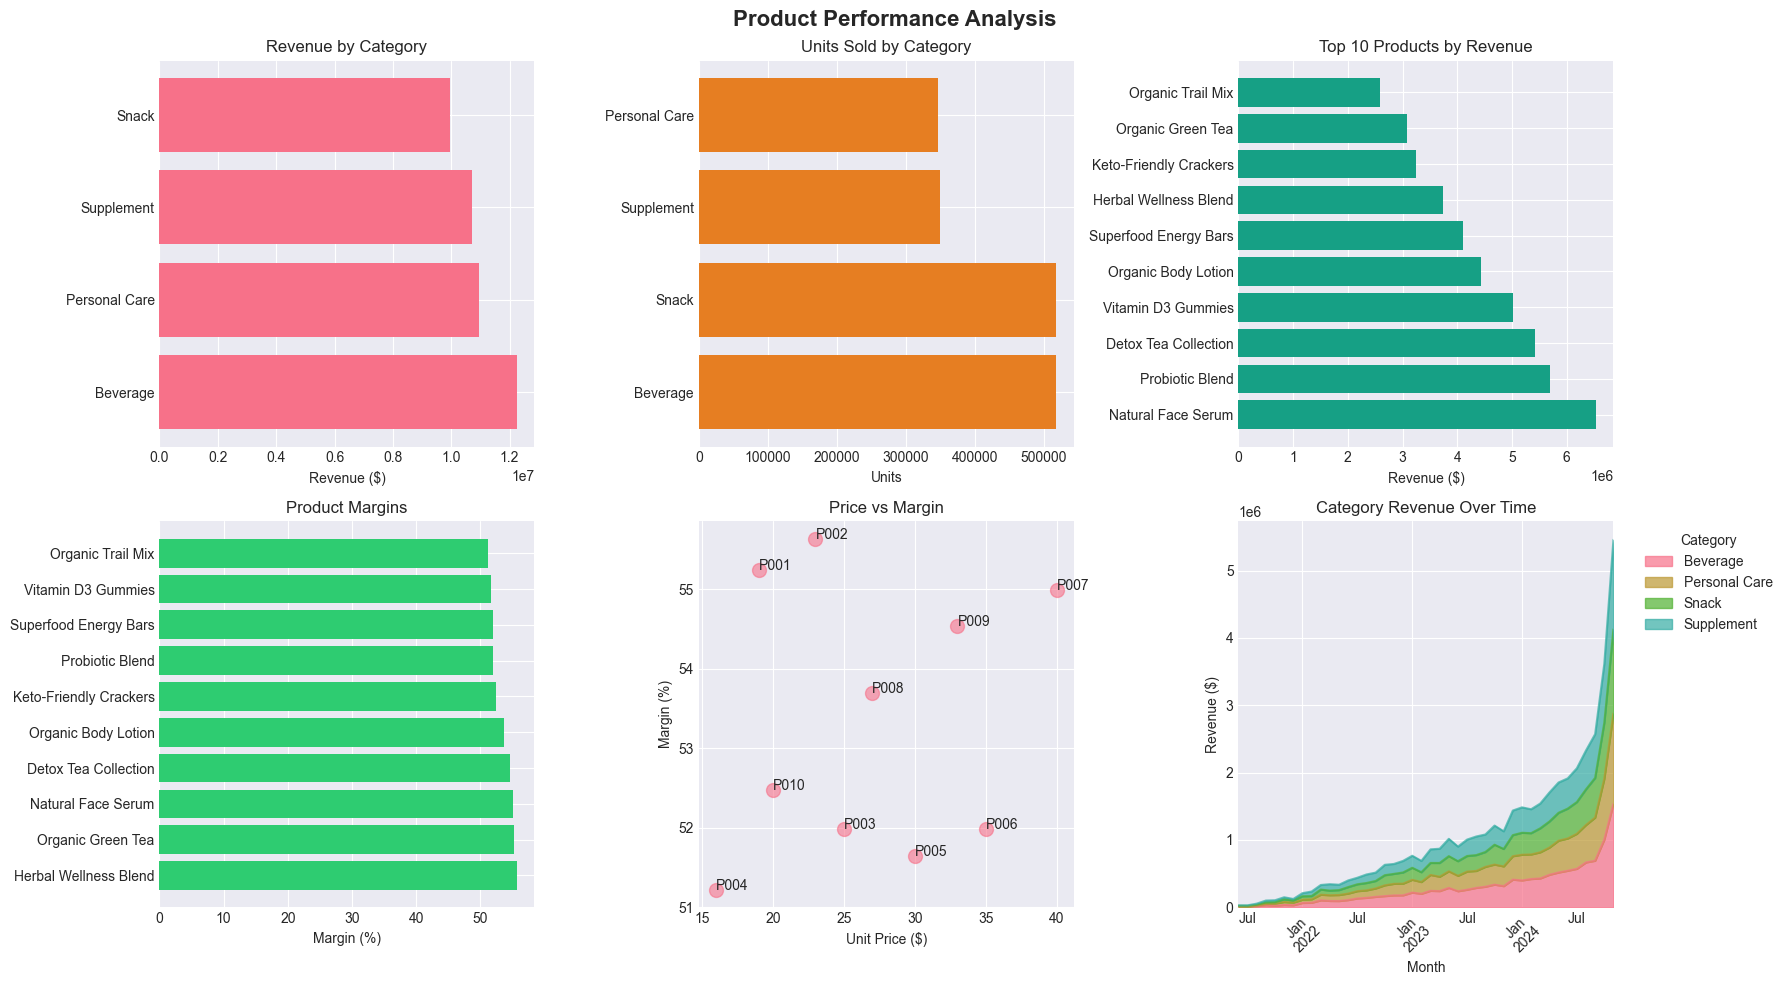

In [16]:
# Product analysis
line_items_clean = order_line_items[order_line_items['order_date'].notna()].copy()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Product Performance Analysis', fontsize=16, fontweight='bold')

# Revenue by category
category_rev = line_items_clean.groupby('category')['revenue'].sum().sort_values(ascending=False)
axes[0, 0].barh(category_rev.index, category_rev.values)
axes[0, 0].set_title('Revenue by Category')
axes[0, 0].set_xlabel('Revenue ($)')

# Units sold by category
category_units = line_items_clean.groupby('category')['quantity'].sum().sort_values(ascending=False)
axes[0, 1].barh(category_units.index, category_units.values, color='#e67e22')
axes[0, 1].set_title('Units Sold by Category')
axes[0, 1].set_xlabel('Units')

# Top 10 products by revenue
product_rev = line_items_clean.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)
axes[0, 2].barh(product_rev.index, product_rev.values, color='#16a085')
axes[0, 2].set_title('Top 10 Products by Revenue')
axes[0, 2].set_xlabel('Revenue ($)')

# Compute product margin % 
margin_pct = (products['unit_price'] - products['avg_cogs']) / products['unit_price'] * 100
products['margin_pct'] = np.where(
    products['unit_price'] > 0,
    (products['unit_price'] - products['avg_cogs']) / products['unit_price'] * 100,
    np.nan
).round(2)

# Product margins
product_margins = products[['name', 'margin_pct']].sort_values('margin_pct', ascending=False)
axes[1, 0].barh(product_margins['name'], product_margins['margin_pct'], color='#2ecc71')
axes[1, 0].set_title('Product Margins')
axes[1, 0].set_xlabel('Margin (%)')

# Price distribution
axes[1, 1].scatter(products['unit_price'], products['margin_pct'], s=100, alpha=0.6)
axes[1, 1].set_title('Price vs Margin')
axes[1, 1].set_xlabel('Unit Price ($)')
axes[1, 1].set_ylabel('Margin (%)')
for i, row in products.iterrows():
    axes[1, 1].annotate(row['product_id'], (row['unit_price'], row['margin_pct']))

# Category mix over time
line_items_clean['order_date'] = pd.to_datetime(line_items_clean['order_date'])
line_items_clean['order_month'] = line_items_clean['order_date'].dt.to_period('M')
category_timeline = line_items_clean.groupby(['order_month', 'category'])['revenue'].sum().unstack(fill_value=0)
category_timeline.plot(kind='area', stacked=True, ax=axes[1, 2], alpha=0.7)
axes[1, 2].set_title('Category Revenue Over Time')
axes[1, 2].set_xlabel('Month')
axes[1, 2].set_ylabel('Revenue ($)')
axes[1, 2].legend(title='Category', bbox_to_anchor=(1.05, 1))
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [17]:
print("\nProduct Metrics:")
print(f"  Total SKUs:              {len(products)}")
print(f"  Top Category:            {category_rev.index[0]} (${category_rev.values[0]:,.2f})")
print(f"  Total Units Sold:        {line_items_clean['quantity'].sum():,}")
print(f"  Avg Product Margin:      {products['margin_pct'].mean():.1f}%")




Product Metrics:
  Total SKUs:              10
  Top Category:            Beverage ($12,243,289.29)
  Total Units Sold:        1,732,408
  Avg Product Margin:      53.3%


## Cohort Retention Analysis

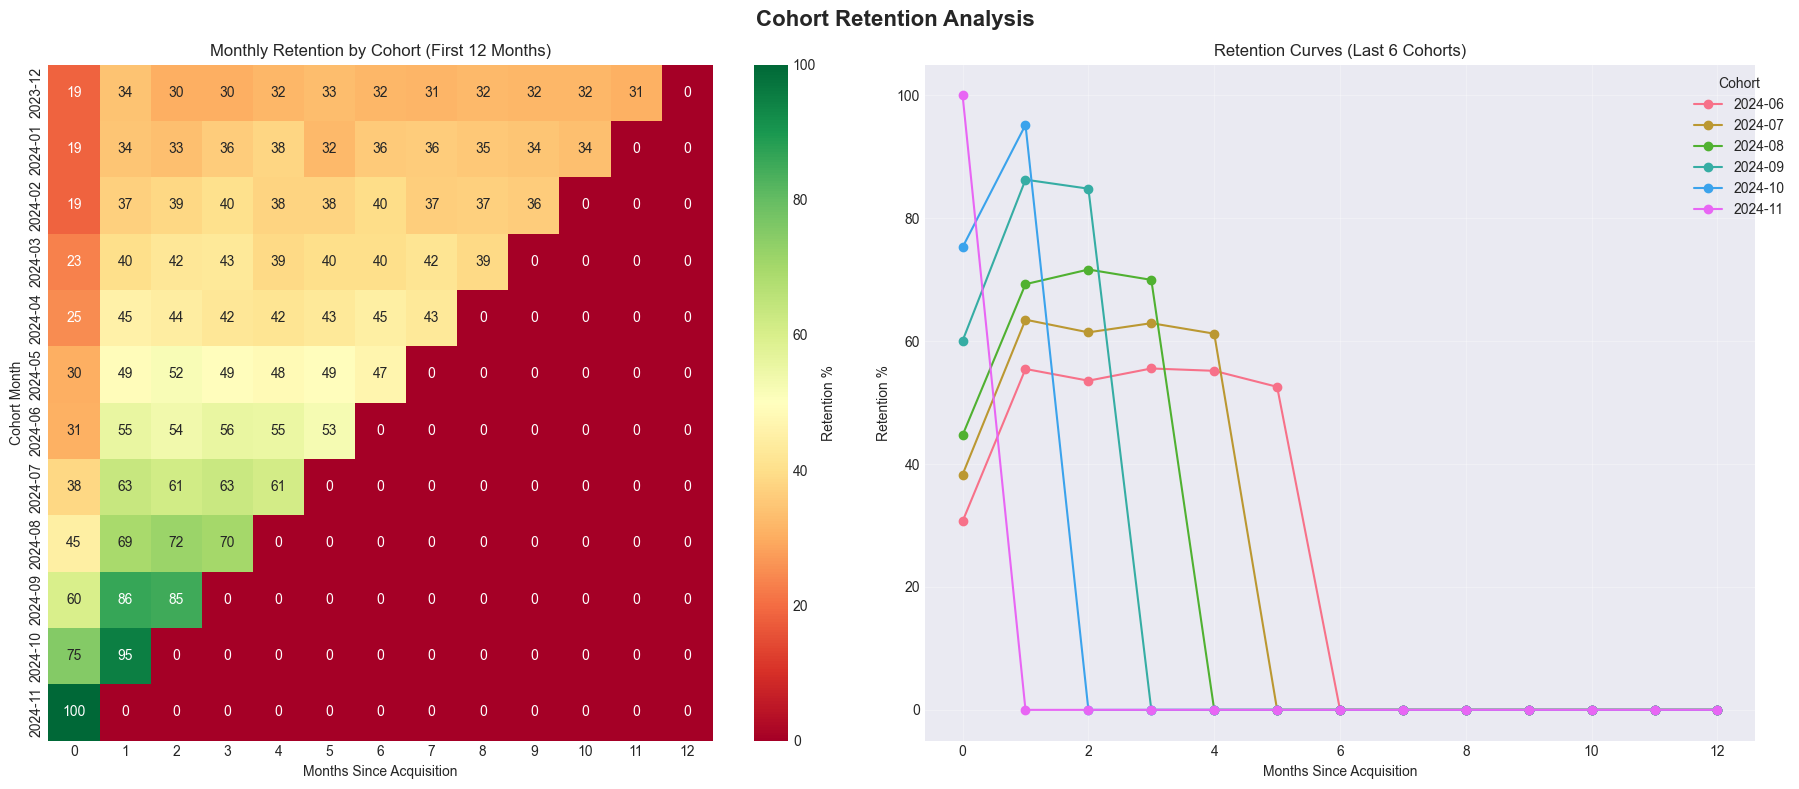


Average Retention Rates:
  Month 0: 40.2%
  Month 1: 50.8%
  Month 2: 42.7%
  Month 3: 35.8%
  Month 4: 29.4%
  Month 5: 24.0%


In [18]:
# Cohort analysis
customers_with_orders = customers_clean.merge(
    orders_clean[['customer_id', 'order_date']], 
    on='customer_id'
)

# Create cohort month
customers_with_orders['cohort_month'] = customers_with_orders['acquisition_date'].dt.to_period('M')
customers_with_orders['order_month'] = customers_with_orders['order_date'].dt.to_period('M')

# Calculate months since cohort
customers_with_orders['months_since_cohort'] = (
    (customers_with_orders['order_month'] - customers_with_orders['cohort_month']).apply(lambda x: x.n)
)

# Build cohort table
cohort_data = customers_with_orders.groupby(['cohort_month', 'months_since_cohort'])['customer_id'].nunique()
cohort_sizes = customers_clean.groupby(
    customers_clean['acquisition_date'].dt.to_period('M')
)['customer_id'].nunique()

# Create retention matrix
cohort_pivot = cohort_data.unstack(fill_value=0)
cohort_retention = cohort_pivot.div(cohort_sizes, axis=0) * 100

# Filter to first 12 months and recent cohorts
recent_cohorts = cohort_retention.tail(12)
retention_12m = recent_cohorts.iloc[:, :13]  # First 12 months

# Plot cohort retention heatmap
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Cohort Retention Analysis', fontsize=16, fontweight='bold')

# Heatmap
sns.heatmap(retention_12m, annot=True, fmt='.0f', cmap='RdYlGn', 
            ax=axes[0], cbar_kws={'label': 'Retention %'})
axes[0].set_title('Monthly Retention by Cohort (First 12 Months)')
axes[0].set_xlabel('Months Since Acquisition')
axes[0].set_ylabel('Cohort Month')

# Retention curves
for cohort in retention_12m.index[-6:]:  # Last 6 cohorts
    cohort_data_line = retention_12m.loc[cohort].dropna()
    axes[1].plot(cohort_data_line.index, cohort_data_line.values, 
                marker='o', label=str(cohort))

axes[1].set_title('Retention Curves (Last 6 Cohorts)')
axes[1].set_xlabel('Months Since Acquisition')
axes[1].set_ylabel('Retention %')
axes[1].legend(title='Cohort', bbox_to_anchor=(1.05, 1))
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate average retention by month
avg_retention = retention_12m.mean()
print("\nAverage Retention Rates:")
for month in range(min(6, len(avg_retention))):
    print(f"  Month {month}: {avg_retention.iloc[month]:.1f}%")

## Customer Lifetime Value Analysis

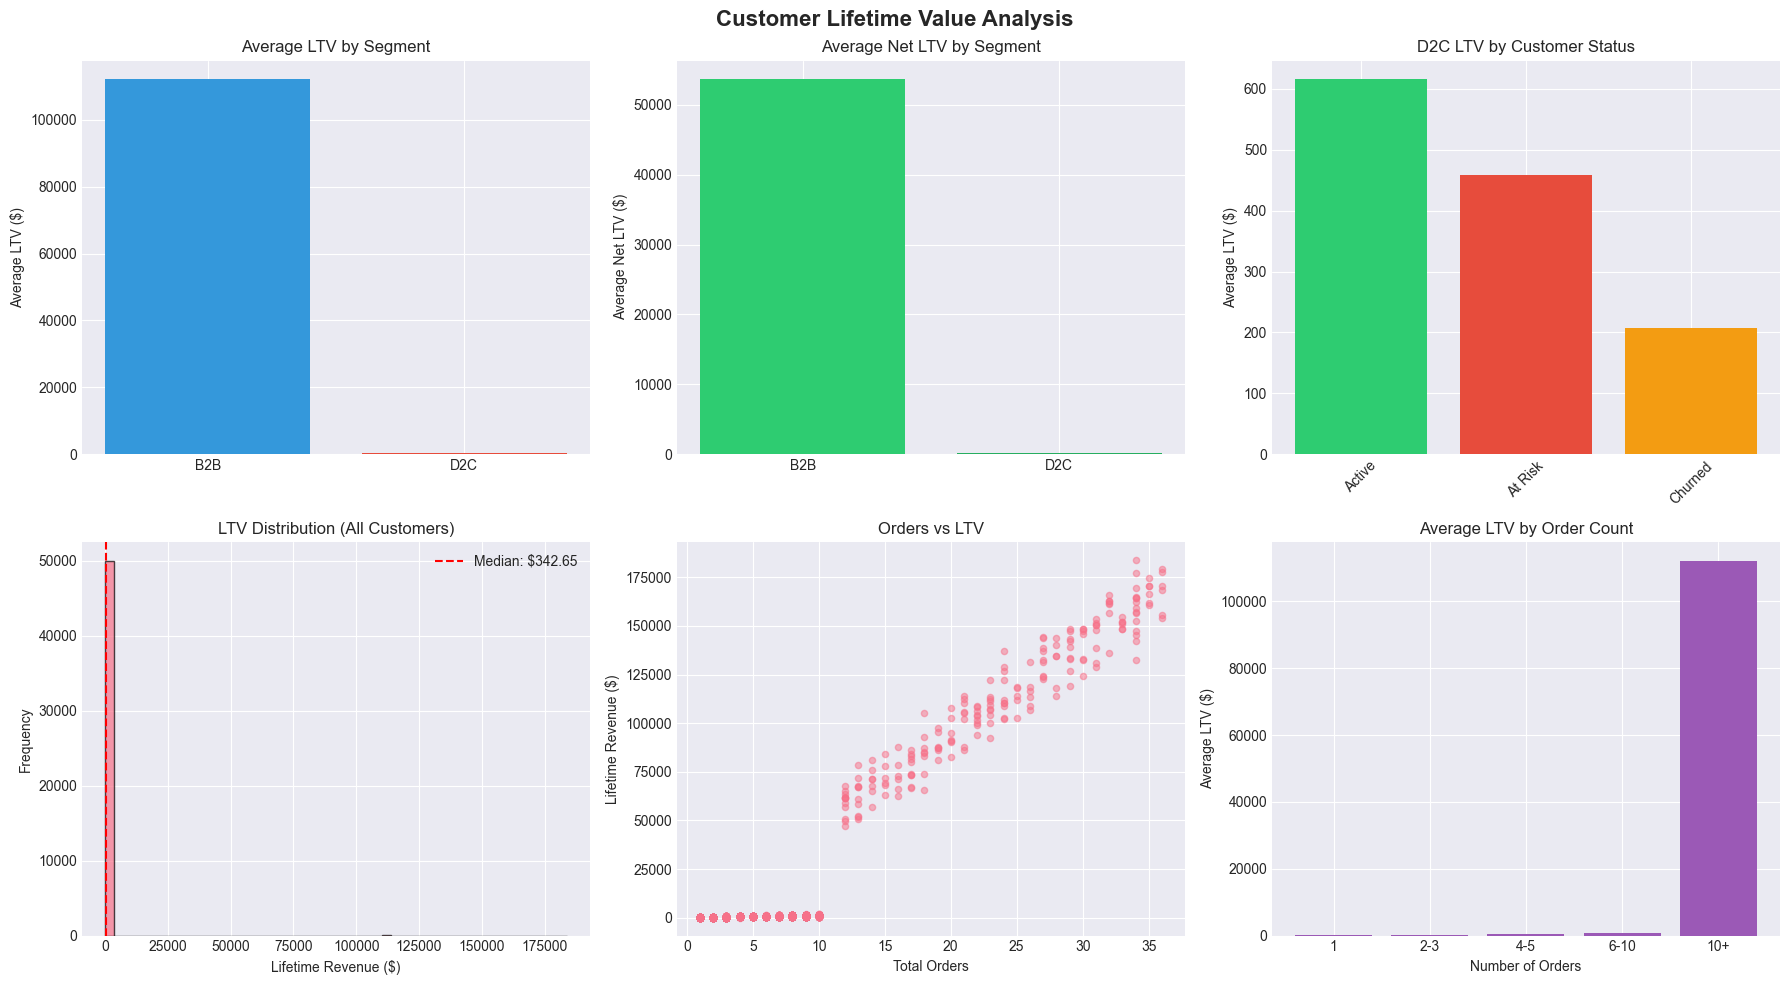

In [19]:
# Calculate LTV metrics
customer_ltv = orders_clean.merge(
    customers[['customer_id', 'segment', 'status']], 
    on='customer_id'
).groupby(['customer_id', 'segment', 'status']).agg({
    'revenue': 'sum',
    'profit': 'sum',
    'order_id': 'count'
}).reset_index()

customer_ltv.columns = ['customer_id', 'segment', 'status', 'lifetime_revenue', 
                        'lifetime_profit', 'total_orders']

# Plot LTV analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Customer Lifetime Value Analysis', fontsize=16, fontweight='bold')

# LTV by segment
ltv_by_segment = customer_ltv.groupby('segment')['lifetime_revenue'].mean()
axes[0, 0].bar(ltv_by_segment.index, ltv_by_segment.values, color=['#3498db', '#e74c3c'])
axes[0, 0].set_title('Average LTV by Segment')
axes[0, 0].set_ylabel('Average LTV ($)')

# Net LTV by segment
net_ltv_by_segment = customer_ltv[customer_ltv['lifetime_profit'].notna()].groupby('segment')['lifetime_profit'].mean()
axes[0, 1].bar(net_ltv_by_segment.index, net_ltv_by_segment.values, color=['#2ecc71', '#27ae60'])
axes[0, 1].set_title('Average Net LTV by Segment')
axes[0, 1].set_ylabel('Average Net LTV ($)')

# LTV by status (D2C)
d2c_ltv = customer_ltv[customer_ltv['segment'] == 'D2C']
ltv_by_status = d2c_ltv.groupby('status')['lifetime_revenue'].mean()
axes[0, 2].bar(ltv_by_status.index, ltv_by_status.values, color=['#2ecc71', '#e74c3c', '#f39c12'])
axes[0, 2].set_title('D2C LTV by Customer Status')
axes[0, 2].set_ylabel('Average LTV ($)')
axes[0, 2].tick_params(axis='x', rotation=45)

# LTV distribution
axes[1, 0].hist(customer_ltv['lifetime_revenue'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('LTV Distribution (All Customers)')
axes[1, 0].set_xlabel('Lifetime Revenue ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(customer_ltv['lifetime_revenue'].median(), color='red', 
                   linestyle='--', label=f'Median: ${customer_ltv["lifetime_revenue"].median():.2f}')
axes[1, 0].legend()

# Orders vs LTV
axes[1, 1].scatter(customer_ltv['total_orders'], customer_ltv['lifetime_revenue'], 
                  alpha=0.5, s=20)
axes[1, 1].set_title('Orders vs LTV')
axes[1, 1].set_xlabel('Total Orders')
axes[1, 1].set_ylabel('Lifetime Revenue ($)')

# LTV by order count buckets
customer_ltv['order_bucket'] = pd.cut(customer_ltv['total_orders'], 
                                      bins=[0, 1, 3, 5, 10, 100],
                                      labels=['1', '2-3', '4-5', '6-10', '10+'])
ltv_by_orders = customer_ltv.groupby('order_bucket')['lifetime_revenue'].mean()
axes[1, 2].bar(range(len(ltv_by_orders)), ltv_by_orders.values, color='#9b59b6')
axes[1, 2].set_xticks(range(len(ltv_by_orders)))
axes[1, 2].set_xticklabels(ltv_by_orders.index)
axes[1, 2].set_title('Average LTV by Order Count')
axes[1, 2].set_xlabel('Number of Orders')
axes[1, 2].set_ylabel('Average LTV ($)')

plt.tight_layout()
plt.show()

In [20]:
# Summary statistics
print("\nLTV Summary Statistics:")
print(f"\nD2C Segment:")
print(f"  Average LTV:         ${d2c_ltv['lifetime_revenue'].mean():,.2f}")
print(f"  Median LTV:          ${d2c_ltv['lifetime_revenue'].median():,.2f}")
print(f"  Average Net LTV:     ${d2c_ltv['lifetime_profit'].mean():,.2f}")
print(f"  Average Orders:      {d2c_ltv['total_orders'].mean():.1f}")

b2b_ltv = customer_ltv[customer_ltv['segment'] == 'B2B']
print(f"\nB2B Segment:")
print(f"  Average LTV:         ${b2b_ltv['lifetime_revenue'].mean():,.2f}")
print(f"  Median LTV:          ${b2b_ltv['lifetime_revenue'].median():,.2f}")
print(f"  Average Net LTV:     ${b2b_ltv['lifetime_profit'].mean():,.2f}")
print(f"  Average Orders:      {b2b_ltv['total_orders'].mean():.1f}")


LTV Summary Statistics:

D2C Segment:
  Average LTV:         $429.05
  Median LTV:          $340.89
  Average Net LTV:     $215.81
  Average Orders:      4.1

B2B Segment:
  Average LTV:         $112,117.37
  Median LTV:          $110,250.71
  Average Net LTV:     $53,670.63
  Average Orders:      23.8


## Customer Acquisition Analysis

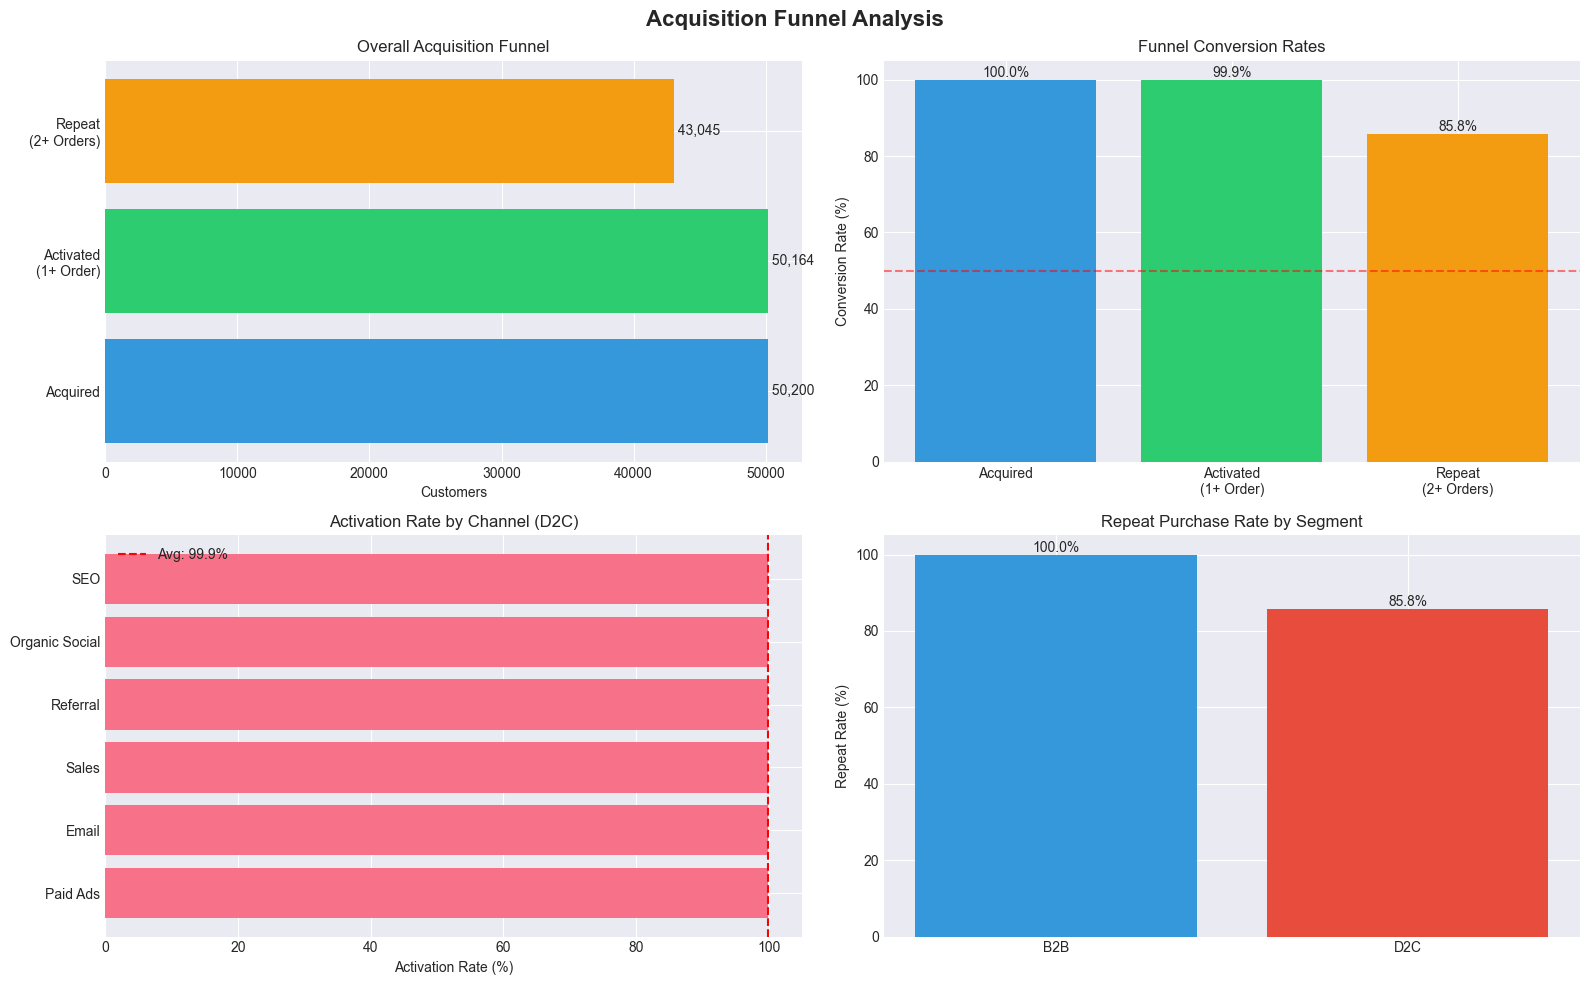

In [ ]:
# Acquisition Funnel Analysis

customer_journey = customers.merge(
    orders_clean.groupby('customer_id').agg(
        first_order_date=('order_date', 'min'),
        total_orders=('order_date', 'count')
    ).reset_index(),
    on='customer_id',
    how='left'
)

customer_journey.columns = ['customer_id', 'segment', 'acquisition_date', 'channel', 
                           'country', 'status', 'company_name', 'account_tier',
                           'first_order_date', 'total_orders']

# Fill NaN for customers without orders
customer_journey['total_orders'] = customer_journey['total_orders'].fillna(0)
customer_journey['has_purchased'] = customer_journey['total_orders'] > 0
customer_journey['is_repeat'] = customer_journey['total_orders'] > 1

# Funnel metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Acquisition Funnel Analysis', fontsize=16, fontweight='bold')

# Overall funnel
funnel_stages = [
    len(customer_journey),
    customer_journey['has_purchased'].sum(),
    customer_journey['is_repeat'].sum()
]
funnel_labels = ['Acquired', 'Activated\n(1+ Order)', 'Repeat\n(2+ Orders)']
funnel_colors = ['#3498db', '#2ecc71', '#f39c12']

axes[0, 0].barh(funnel_labels, funnel_stages, color=funnel_colors)
axes[0, 0].set_title('Overall Acquisition Funnel')
axes[0, 0].set_xlabel('Customers')
for i, v in enumerate(funnel_stages):
    axes[0, 0].text(v, i, f' {v:,}', va='center')

# Conversion rates
activation_rate = customer_journey['has_purchased'].mean() * 100 # activation rate means they bought at least once
# guard against division by zero
if customer_journey['has_purchased'].sum() > 0:
    repeat_rate = (customer_journey['is_repeat'].sum() / 
                   customer_journey['has_purchased'].sum() * 100)
else:
    repeat_rate = 0.0

rates = [100, activation_rate, repeat_rate]
axes[0, 1].bar(funnel_labels, rates, color=funnel_colors)
axes[0, 1].set_title('Funnel Conversion Rates')
axes[0, 1].set_ylabel('Conversion Rate (%)')
axes[0, 1].axhline(y=50, color='red', linestyle='--', alpha=0.5)
for i, v in enumerate(rates):
    axes[0, 1].text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# Activation by channel (D2C)
d2c_journey = customer_journey[
    (customer_journey['segment'] == 'D2C') & 
    (customer_journey['channel'].notna())
]
channel_activation = d2c_journey.groupby('channel').agg({
    'customer_id': 'count',
    'has_purchased': 'sum'
}).reset_index()
channel_activation['activation_rate'] = (
    channel_activation['has_purchased'] / channel_activation['customer_id'] * 100
)
channel_activation = channel_activation.sort_values('activation_rate', ascending=True)

axes[1, 0].barh(channel_activation['channel'], channel_activation['activation_rate'])
axes[1, 0].set_title('Activation Rate by Channel (D2C)')
axes[1, 0].set_xlabel('Activation Rate (%)')
axes[1, 0].axvline(x=activation_rate, color='red', linestyle='--', 
                   label=f'Avg: {activation_rate:.1f}%')
axes[1, 0].legend()

# Repeat rate by segment
segment_repeat = customer_journey[customer_journey['has_purchased']].groupby('segment').agg({
    'customer_id': 'count',
    'is_repeat': 'sum'
}).reset_index()
segment_repeat['repeat_rate'] = (
    segment_repeat['is_repeat'] / segment_repeat['customer_id'] * 100
)

axes[1, 1].bar(segment_repeat['segment'], segment_repeat['repeat_rate'], 
               color=['#3498db', '#e74c3c'])
axes[1, 1].set_title('Repeat Purchase Rate by Segment')
axes[1, 1].set_ylabel('Repeat Rate (%)')
for i, row in segment_repeat.iterrows():
    axes[1, 1].text(i, row['repeat_rate'], f"{row['repeat_rate']:.1f}%", 
                   ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [25]:
print("\nAcquisition Funnel Summary:")

print("\nFunnel Metrics:")
print(f"  Total Acquired:           {len(customer_journey):,}")
print(f"  Activated (1+ order):     {customer_journey['has_purchased'].sum():,}")
print(f"  Activation Rate:          {activation_rate:.1f}%")
print(f"  Repeat Customers:         {customer_journey['is_repeat'].sum():,}")
print(f"  Repeat Rate:              {repeat_rate:.1f}%")


Acquisition Funnel Summary:

Funnel Metrics:
  Total Acquired:           50,200
  Activated (1+ order):     50,164
  Activation Rate:          99.9%
  Repeat Customers:         43,045
  Repeat Rate:              85.8%


## Time-series Analysis: Temporal Insights

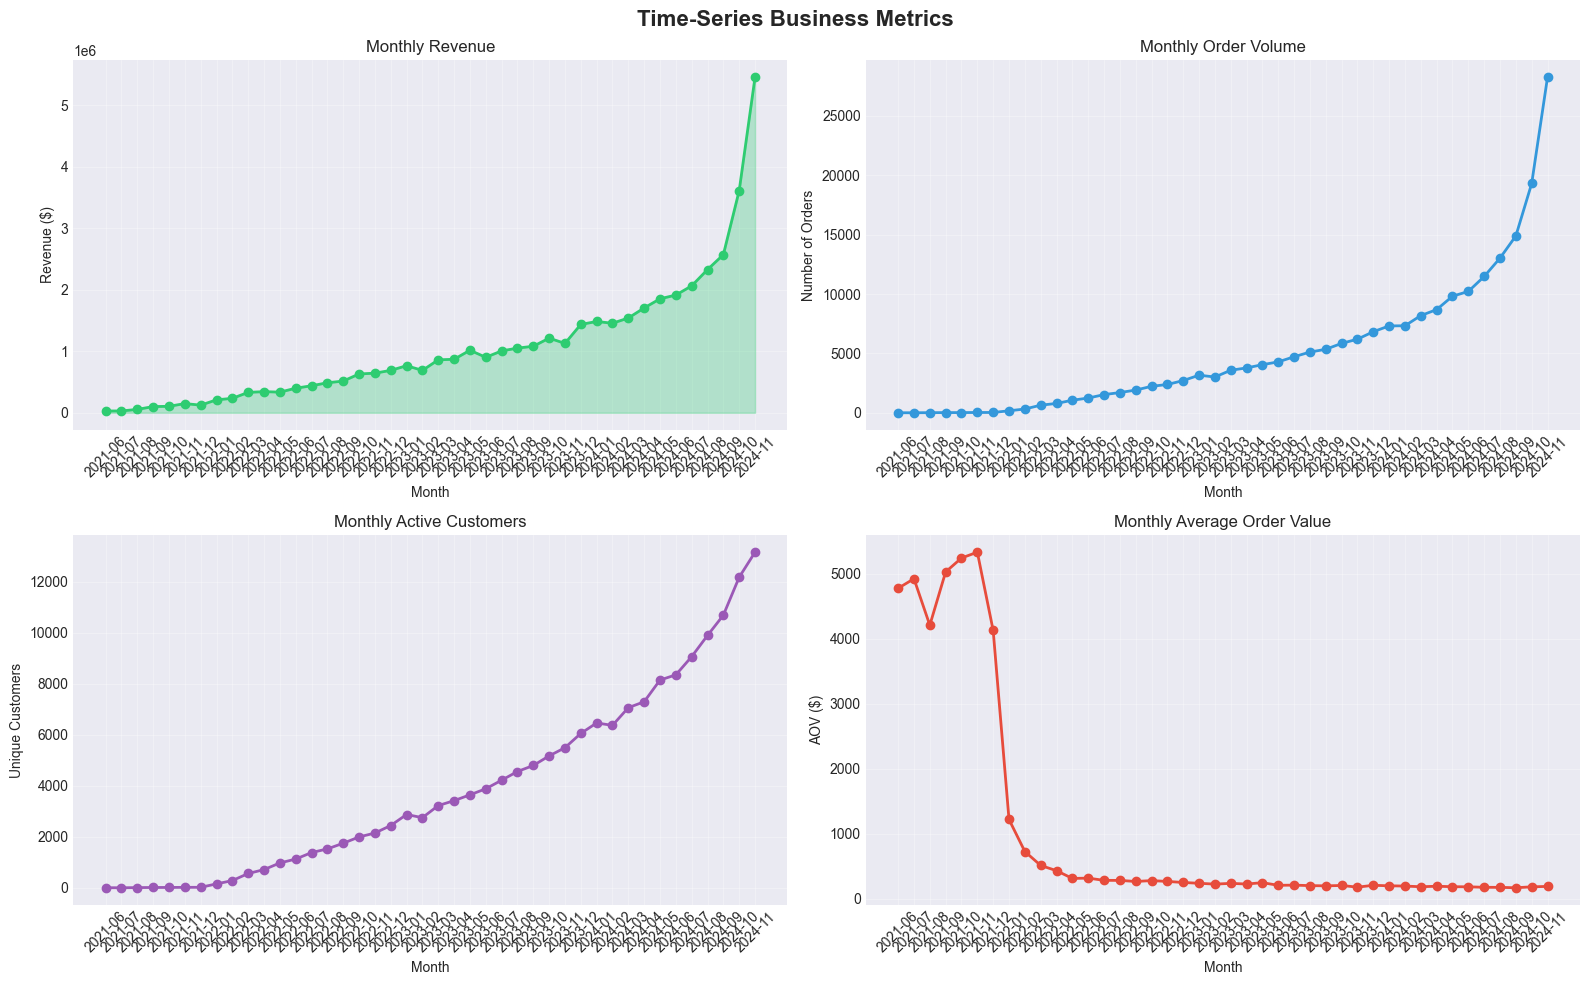

In [ ]:
# Monthly trends
monthly_metrics = orders_clean.groupby('order_month').agg({
    'order_id': 'count',
    'revenue': 'sum',
    'profit': 'sum',
    'customer_id': 'nunique'
}).reset_index()

monthly_metrics.columns = ['month', 'orders', 'revenue', 'profit', 'unique_customers']
monthly_metrics['avg_order_value'] = monthly_metrics['revenue'] / monthly_metrics['orders']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Time-Series Business Metrics', fontsize=16, fontweight='bold')

# Monthly revenue
axes[0, 0].plot(monthly_metrics['month'].astype(str), monthly_metrics['revenue'], 
               marker='o', linewidth=2, color='#2ecc71')
axes[0, 0].fill_between(range(len(monthly_metrics)), monthly_metrics['revenue'], 
                        alpha=0.3, color='#2ecc71')
axes[0, 0].set_title('Monthly Revenue')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Revenue ($)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Monthly orders
axes[0, 1].plot(monthly_metrics['month'].astype(str), monthly_metrics['orders'], 
               marker='o', linewidth=2, color='#3498db')
axes[0, 1].set_title('Monthly Order Volume')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Orders')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Monthly active customers
axes[1, 0].plot(monthly_metrics['month'].astype(str), monthly_metrics['unique_customers'], 
               marker='o', linewidth=2, color='#9b59b6')
axes[1, 0].set_title('Monthly Active Customers')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Unique Customers')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Average order value
axes[1, 1].plot(monthly_metrics['month'].astype(str), monthly_metrics['avg_order_value'], 
               marker='o', linewidth=2, color='#e74c3c')
axes[1, 1].set_title('Monthly Average Order Value')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('AOV ($)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [27]:
# Computing growth metrics
recent_3m = monthly_metrics.tail(3)['revenue'].mean()
previous_3m = monthly_metrics.iloc[-6:-3]['revenue'].mean()
growth_rate = ((recent_3m - previous_3m) / previous_3m * 100)



print(f"\nGrowth Metrics:")
print(f"  Recent 3-month avg revenue:    ${recent_3m:,.2f}")
print(f"  Previous 3-month avg revenue:  ${previous_3m:,.2f}")
print(f"  Growth rate:                   {growth_rate:+.1f}%")


Growth Metrics:
  Recent 3-month avg revenue:    $3,880,499.25
  Previous 3-month avg revenue:  $2,102,211.02
  Growth rate:                   +84.6%


## Customer Status and Churn Analysis

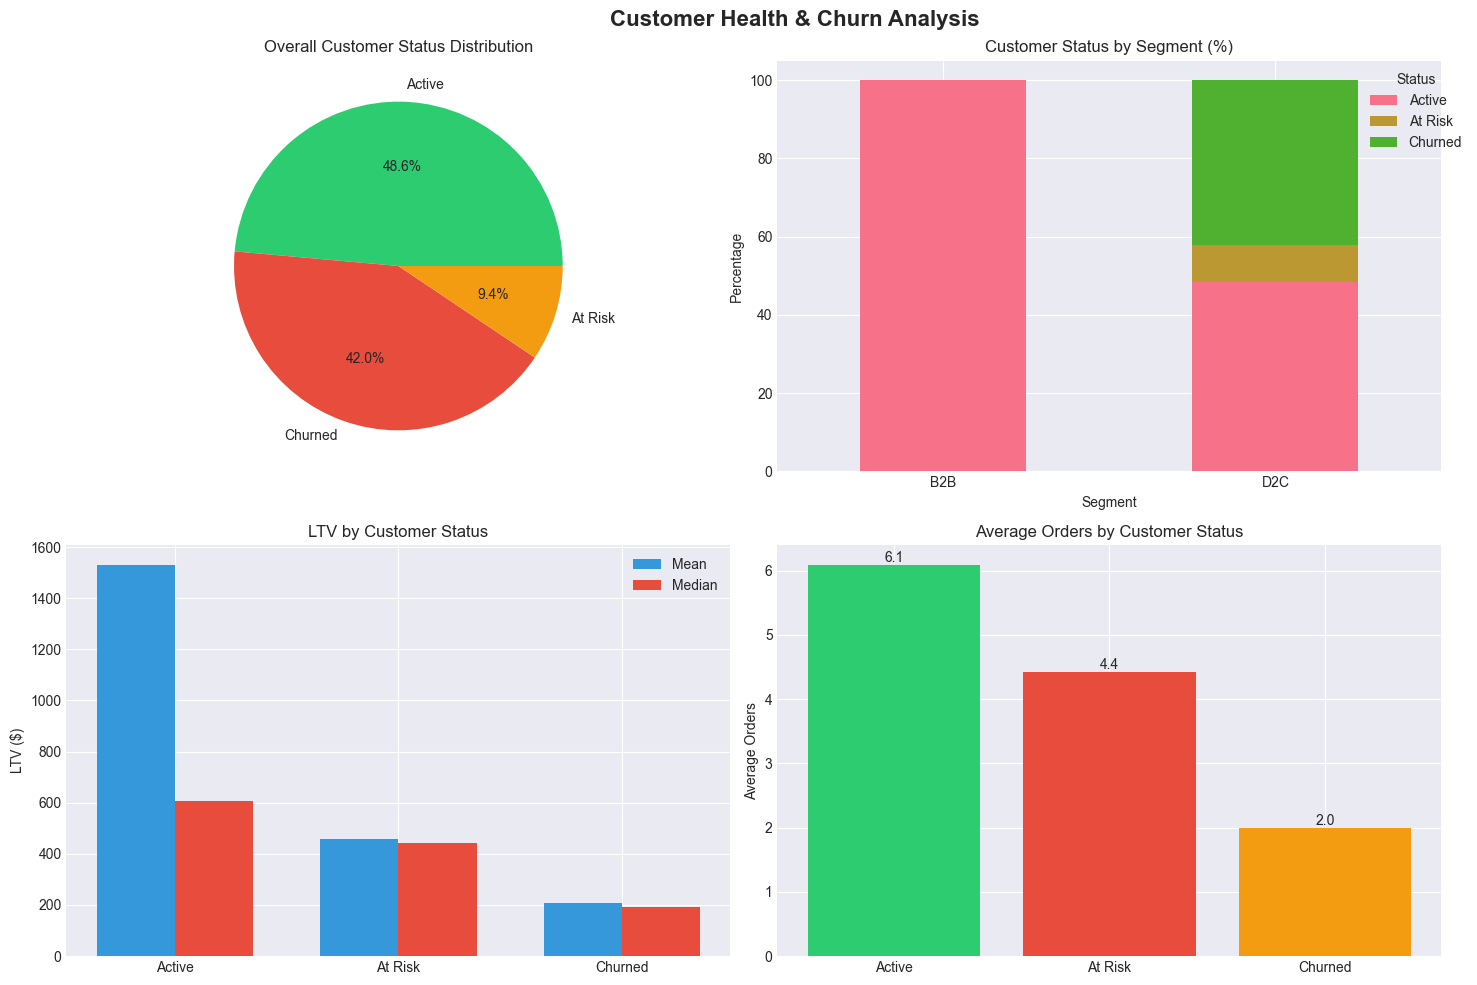

In [28]:
# Customer Status & Churn Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Customer Health & Churn Analysis', fontsize=16, fontweight='bold')

# Status distribution
status_dist = customers['status'].value_counts()
axes[0, 0].pie(status_dist.values, labels=status_dist.index, autopct='%1.1f%%',
              colors=['#2ecc71', '#e74c3c', '#f39c12'])
axes[0, 0].set_title('Overall Customer Status Distribution')

# Status by segment
status_by_segment = customers.groupby(['segment', 'status']).size().unstack(fill_value=0)
status_by_segment_pct = status_by_segment.div(status_by_segment.sum(axis=1), axis=0) * 100
status_by_segment_pct.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Customer Status by Segment (%)')
axes[0, 1].set_xlabel('Segment')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='Status', bbox_to_anchor=(1.05, 1))
axes[0, 1].tick_params(axis='x', rotation=0)

# LTV comparison by status
ltv_by_status_all = customer_ltv.groupby('status')['lifetime_revenue'].agg(['mean', 'median'])
x = range(len(ltv_by_status_all))
width = 0.35
axes[1, 0].bar([i - width/2 for i in x], ltv_by_status_all['mean'], 
              width, label='Mean', color='#3498db')
axes[1, 0].bar([i + width/2 for i in x], ltv_by_status_all['median'], 
              width, label='Median', color='#e74c3c')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(ltv_by_status_all.index)
axes[1, 0].set_title('LTV by Customer Status')
axes[1, 0].set_ylabel('LTV ($)')
axes[1, 0].legend()

# Orders by status
orders_by_status = customer_ltv.groupby('status')['total_orders'].mean()
axes[1, 1].bar(orders_by_status.index, orders_by_status.values, 
              color=['#2ecc71', '#e74c3c', '#f39c12'])
axes[1, 1].set_title('Average Orders by Customer Status')
axes[1, 1].set_ylabel('Average Orders')
for i, v in enumerate(orders_by_status.values):
    axes[1, 1].text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [31]:
print("\nCustomer Health Metrics:")
for status in customers['status'].unique():
    count = len(customers[customers['status'] == status])
    pct = count / len(customers) * 100
    avg_ltv = customer_ltv[customer_ltv['status'] == status]['lifetime_revenue'].mean()
    print(f"\n{status}:")
    print(f"  Count:           {count:,} ({pct:.1f}%)")
    print(f"  Avg LTV:         ${avg_ltv:,.2f}")

    


Customer Health Metrics:

Active:
  Count:           24,389 (48.6%)
  Avg LTV:         $1,530.31

Churned:
  Count:           21,088 (42.0%)
  Avg LTV:         $207.60

At Risk:
  Count:           4,723 (9.4%)
  Avg LTV:         $458.85
